In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv(r'D:\.Universidade\Doutoramento_Engenharia_Mecanica\Datasets\Backup_save\Dados_SISMA\Testes U500Xd2\Testes U500Xd2\pinças\ensaio5\2025-05-23_16-55-08\daq_data.csv')
data_daq = np.array(data[['Cu']]).squeeze()

op_labels = []
cu_rms_values = []

with open(r"C:\Users\Lenovo\Desktop\CNC_Influx2\influx_simulated_labeled.txt", "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue

        parts = line.split(" ", 2)
        if len(parts) != 3:
            continue

        tag_part, fields_part, _ = parts
        tag_parts = tag_part.split(",")

        # Extract op label
        for part in tag_parts:
            if part.startswith("op="):
                op_label = part.split("=")[1]
                op_labels.append(op_label)
                break

        # Extract Cu_rms value
        field_dict = dict(kv.split("=") for kv in fields_part.split(","))
        cu_rms = float(field_dict.get("Cu_rms", 0.0))
        cu_rms_values.append(cu_rms)


print(len(op_labels))
print(len(data_daq))

71700
71700


['spindle_peak', 'Op_14', 'idle']


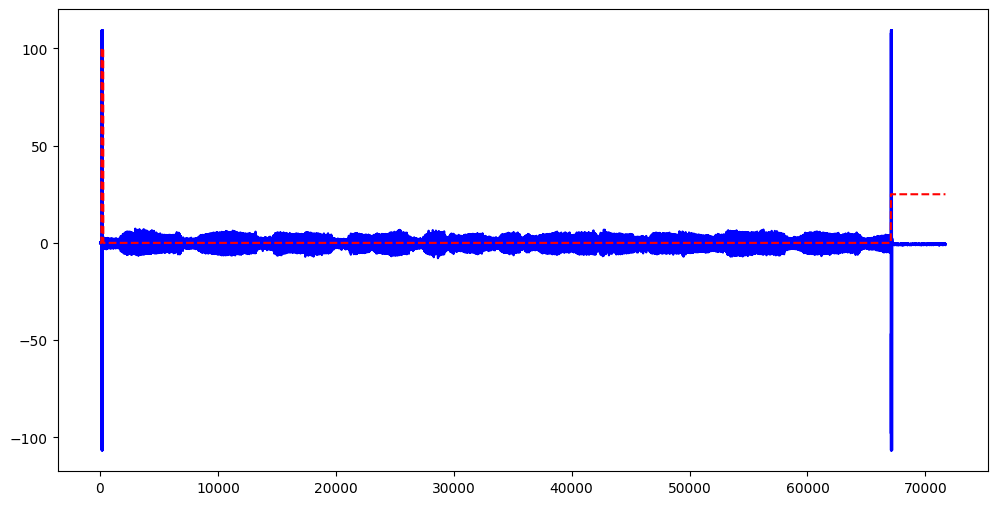

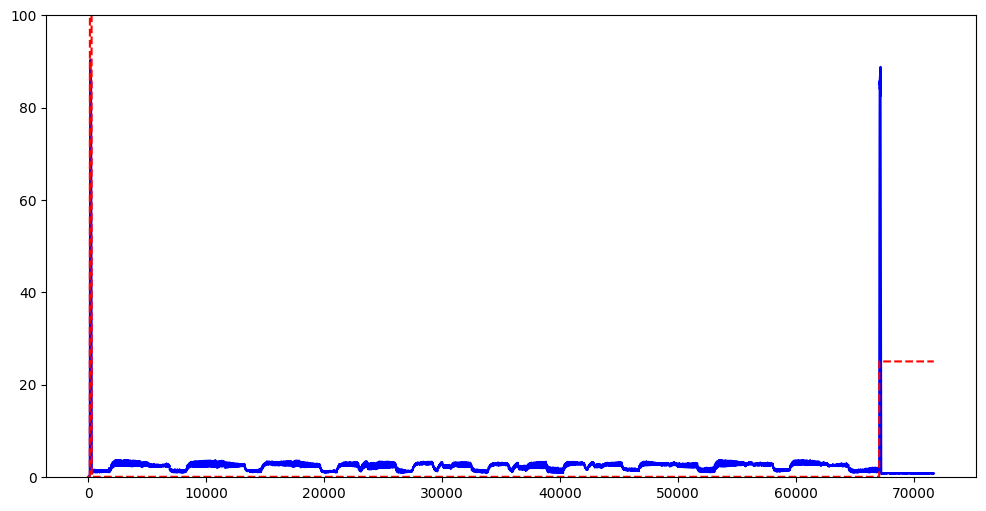

In [135]:
op_labels_unique = list(set(op_labels))
print(op_labels_unique)
op_num = []
for label in op_labels:
    if label == "Op_14":
        op_num.append(25)
    elif label == "spindle_peak":
        op_num.append(100)
    elif label == "idle":
        op_num.append(0)
    elif label == "Op_15":
        op_num.append(50)
    elif label == "Op_3":
        op_num.append(75)

xaxis = np.arange(len(data_daq))
plt.figure(figsize=(12, 6)) 
plt.plot(xaxis, data_daq, label='Cu', color='blue')
plt.plot(xaxis, op_num, label='Op', color='red', linestyle='--')
plt.show()
plt.close()

xaxis = np.arange(len(data_daq))
plt.figure(figsize=(12, 6)) 
plt.plot(xaxis, cu_rms_values, label='Cu', color='blue')
plt.plot(xaxis, op_num, label='Op', color='red', linestyle='--')
plt.ylim(-0.1, 100)
plt.show()

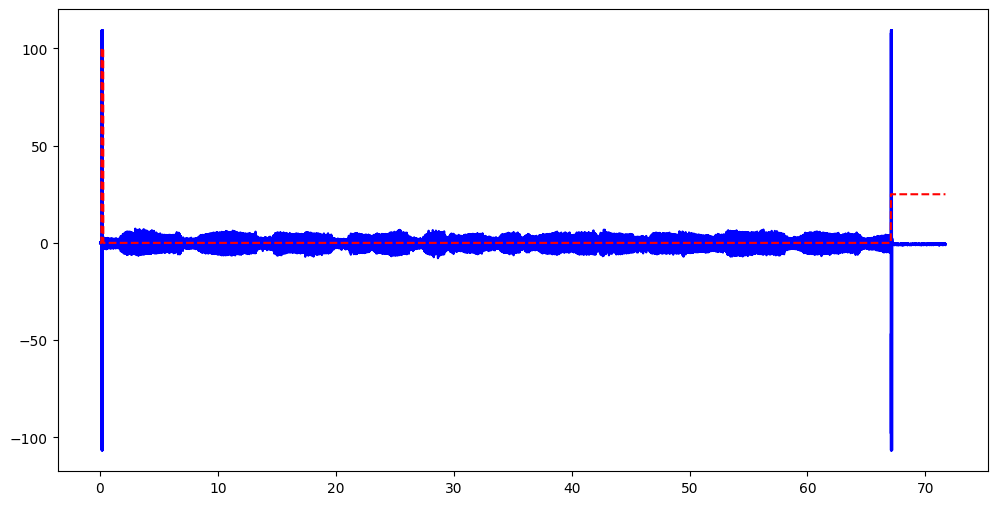

In [136]:
xaxis = np.arange(len(data_daq))*1/1000
plt.figure(figsize=(12, 6)) 
plt.plot(xaxis, data_daq, label='Cu', color='blue')
plt.plot(xaxis, op_num, label='Op', color='red', linestyle='--')
plt.show()